In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,Not Verified | I flew from Malaga via LHR to...
2,✅ Trip Verified | Milan to Miami return via L...
3,✅ Trip Verified | BA created a new low-cost s...
4,✅ Trip Verified | I flew with British Airway...


In [4]:
df

,reviews
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,Not Verified | I flew from Malaga via LHR to...
2,✅ Trip Verified | Milan to Miami return via L...
3,✅ Trip Verified | BA created a new low-cost s...
4,✅ Trip Verified | I flew with British Airway...
...,...
1495,✅ Verified Review | London to New York JFK in...
1496,✅ Verified Review | My wife and I booked two ...
1497,✅ Verified Review | London to Mumbai. The ele...
1498,✅ Verified Review | I travelled to Johannesbu...


In [5]:
df.to_csv("Data/BA_reviews.csv")

In [6]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [7]:
df

,reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor..."
1,I flew from Malaga via LHR to Boston on the...
2,Milan to Miami return via London. Worst busi...
3,BA created a new low-cost subsidiary in BA E...
4,I flew with British Airways from Heathrow t...
...,...
1495,London to New York JFK in club world. After ...
1496,My wife and I booked two round trip business...
1497,London to Mumbai. The electrics at my seat w...
1498,I travelled to Johannesburg from London Heat...


In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...


In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu..."
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)..."
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No..."
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c..."
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath..."


In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...


In [12]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August Club World shame Brit...
1,I flew from Malaga via LHR to Boston on the...,fly Malaga via LHR Boston th May arrival Bos...
2,Milan to Miami return via London. Worst busi...,Milan Miami return via London Worst business...
3,BA created a new low-cost subsidiary in BA E...,BA create new low cost subsidiary BA Eurofly...
4,I flew with British Airways from Heathrow t...,fly British Airways Heathrow Hannover Althou...
...,...,...
1495,London to New York JFK in club world. After ...,London New York JFK club world read mixed re...
1496,My wife and I booked two round trip business...,wife book two round trip business class air ...
1497,London to Mumbai. The electrics at my seat w...,London Mumbai electric seat work may relate ...
1498,I travelled to Johannesburg from London Heat...,travel Johannesburg London Heathrow Sunday n...


In [13]:
%pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 245.8 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 245.8 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 353.1 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 353.1 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 353.1 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 353.1 kB/s eta 0:00:01
   ------------------

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...,0.9545,Positive
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...,0.9898,Positive
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...,-0.8176,Negative


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    752
Negative    585
Neutral     163
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24ee7a943b0>,
 [Text(-0.004607733747590386, 1.0999903494075352, 'Positive'),
  Text(-0.3639281028185587, -1.0380541103328307, 'Negative'),
  Text(1.2720934292838235, -0.4519715778375035, 'Neutral')])

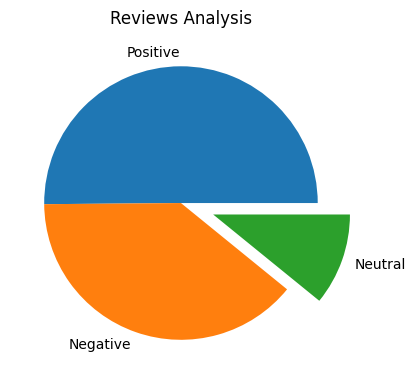

In [17]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25))

In [18]:
df.to_csv("Data/BA_reviews.csv")

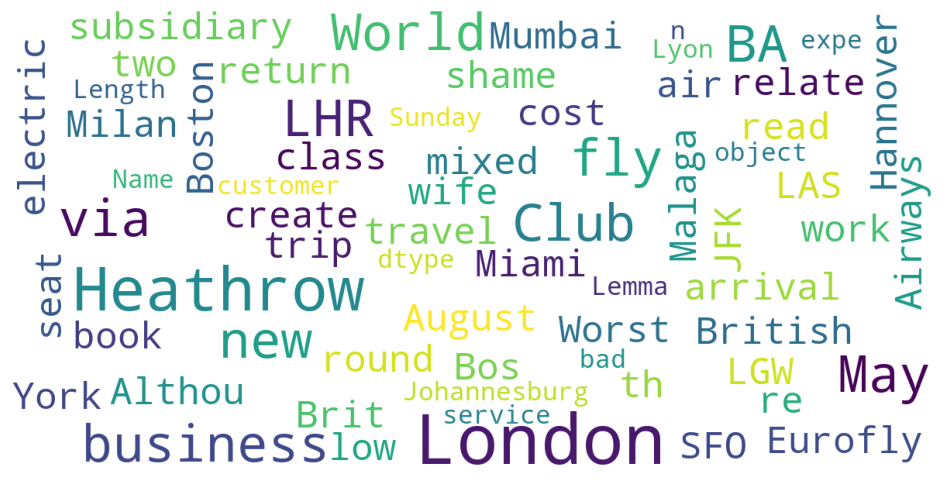

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)